In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("MLDataset.csv",header = None)

In [3]:
df.shape

(539, 292)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,282,283,284,285,286,287,288,289,290,291
0,270745.735639,280998.396454,280149.347693,261942.032815,283662.230045,276637.717211,293364.887629,291132.799529,292170.664803,318357.434030,...,124186.131348,125000.285401,134768.925894,138450.754246,123661.546811,124878.291612,1.0,3540.747103,5.0,82105.510196
1,142734.446728,138392.518267,140947.275038,134427.054413,126031.969257,131865.937183,127655.854955,136601.606290,129367.557098,130744.822386,...,140004.696951,130091.339058,147581.937350,131591.250775,144602.806599,130924.311055,0.0,11877.346706,0.0,82050.193758
2,142763.090142,138110.766082,140354.950113,124568.654649,131936.610114,135362.630909,142391.110436,133353.588977,126797.670749,139759.994619,...,235656.490980,229643.624361,247904.997263,248912.204218,252254.792399,250973.593885,1.0,11412.687496,3.0,81287.287559
3,238116.617502,238452.867183,228563.955970,232785.293015,221361.734529,237019.050075,229094.969158,239863.860851,225760.578967,249448.686857,...,136851.150456,138149.253988,131169.975566,137364.898738,135386.747360,137311.385863,1.0,3599.978966,3.0,82080.607747
4,141981.000817,139893.028348,137981.613576,120549.906929,134939.916234,131150.147650,128464.578139,130846.708291,115532.273701,117794.626877,...,132749.445682,139027.461183,133028.646863,130521.114767,130103.539967,138075.818473,1.0,8081.779160,1.0,81221.634419


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,282,283,284,285,286,287,288,289,290,291
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,223558.431511,219928.990417,215359.400612,208145.781889,214620.055094,215319.415879,219757.217536,216064.408674,214133.080471,221163.984004,...,222681.668181,227670.536239,235218.414863,235342.500268,234084.003146,228391.413309,0.755102,7719.005144,3.504638,81273.300875
std,89438.996424,83106.258602,80994.909358,78319.754768,79746.777520,80770.230663,84507.673013,87532.877638,89393.422275,95158.093476,...,91368.080542,96297.082420,100692.840036,102305.398588,100426.219666,94668.545092,0.430426,3949.268193,2.776273,919.432692
min,121768.093310,123106.712833,122194.239639,117226.976478,123724.156529,124869.961332,122999.308222,118555.971385,113218.459705,113992.600686,...,118583.527982,120712.681717,123319.805783,121424.887412,121853.394859,120803.765790,0.000000,3048.987921,0.000000,77905.677715
25%,137382.751228,139972.313157,137324.759517,133434.880681,138510.853492,137108.257767,139026.519963,132437.661632,128618.404638,130028.863636,...,136350.470392,136597.181100,139552.013436,137364.079294,138209.988124,138103.136679,1.000000,4504.057342,1.000000,81211.207299
50%,209506.844912,209979.290326,199581.800837,192218.540024,204345.486713,204024.906716,209073.965446,203434.627480,199929.908936,205786.296699,...,199736.190006,205353.652501,210923.317771,215393.390607,213118.107446,208299.272528,1.000000,8055.299740,3.000000,81274.951555
75%,297691.639056,289275.871941,284419.458531,272353.000654,280400.543079,280536.763685,291137.097942,286727.769398,285234.088411,300786.589295,...,299710.973196,307390.181290,319172.030087,320897.436940,318833.235035,309542.853933,1.000000,8112.345013,5.000000,82062.439551
max,413523.162270,385562.392411,378650.397399,374840.070196,386039.373002,393125.030898,405511.165209,423494.958550,415626.511302,436048.076186,...,432389.519493,451472.276278,463889.526687,462325.485191,446550.915486,427847.472157,1.000000,20911.505902,9.000000,82124.969690


In [6]:
df.shape

(539, 292)

# Remove uncorrelated colm

In [7]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
df_drop = df.drop(df[to_drop], axis=1)

In [8]:
x = df_drop.iloc[:, :-1].values
y = df_drop.iloc[:, 150].values

In [9]:
y.shape,x.shape

((539,), (539, 150))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [11]:
y_train = y_train.reshape((431,1))

In [12]:
y_train = y_train.reshape((431,1))

In [13]:
clf = DecisionTreeRegressor(random_state=0)
clf.fit(x_train,y_train);

In [14]:
y_pred = clf.predict(x_test)
y_pred = sc_y.inverse_transform(y_pred)

# R2 score before pruning

In [15]:
metrics.r2_score(y_test, y_pred)

0.5334723476538659

In [16]:
df_repre = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

# Actual vs Predicted after removing uncorrelated colms before pruning

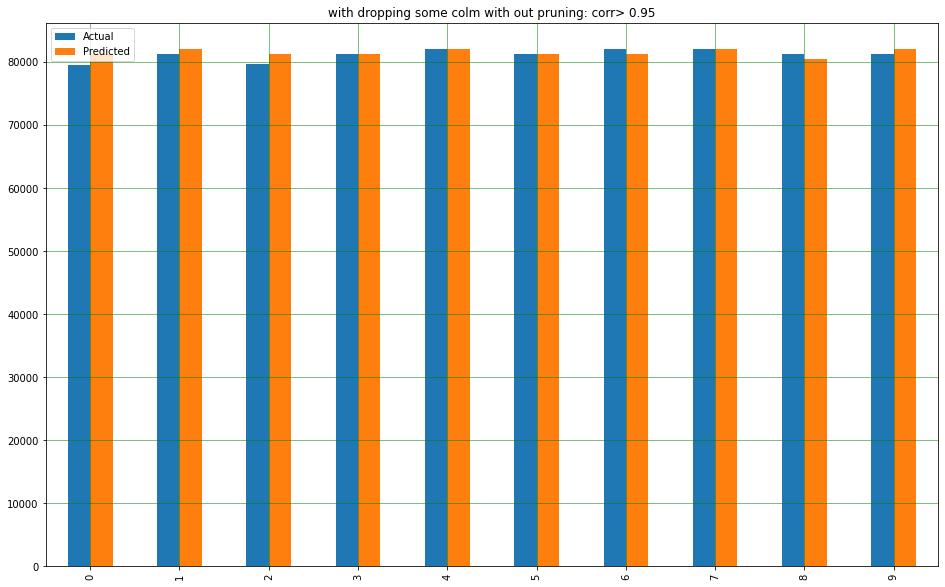

In [17]:
df1 = df_repre.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.title("with dropping some colm with out pruning: corr> 0.95")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Visualiazation of Tree before pruning

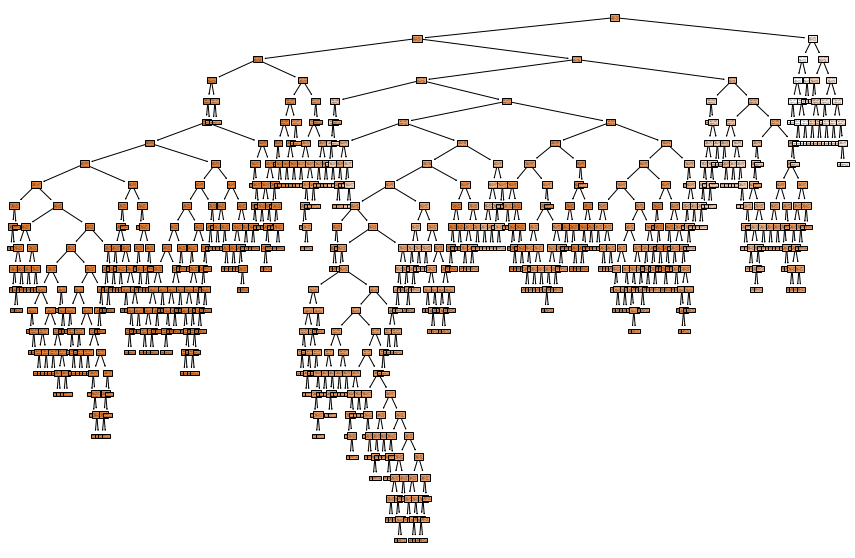

In [18]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True);

# Pruning

In [19]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [20]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.44147722801951716


In [21]:
y_test_change = y_test.reshape((108,1))
y_test_change = sc_y.fit_transform(y_test_change)

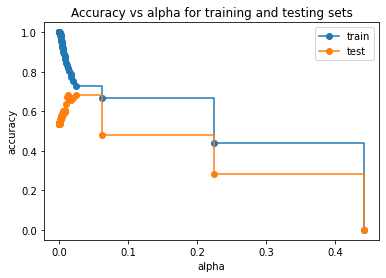

In [22]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]

test_scores = [clf.score(x_test, y_test_change) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

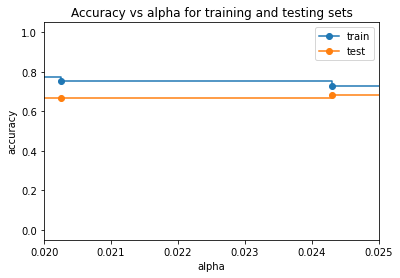

In [23]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test_change) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
plt.xlim([0.02,0.025])
ax.legend()
plt.show()

In [24]:
clf_acc = DecisionTreeRegressor(random_state=0, ccp_alpha = 0.024)
clf_acc.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.024, random_state=0)

#  R2 score

In [25]:
y_pred=clf_acc.predict(x_test)
y_pred = sc_y.inverse_transform(y_pred)
metrics.r2_score(y_test, y_pred)

0.6649739267754585

# Visualizing tree after pruning

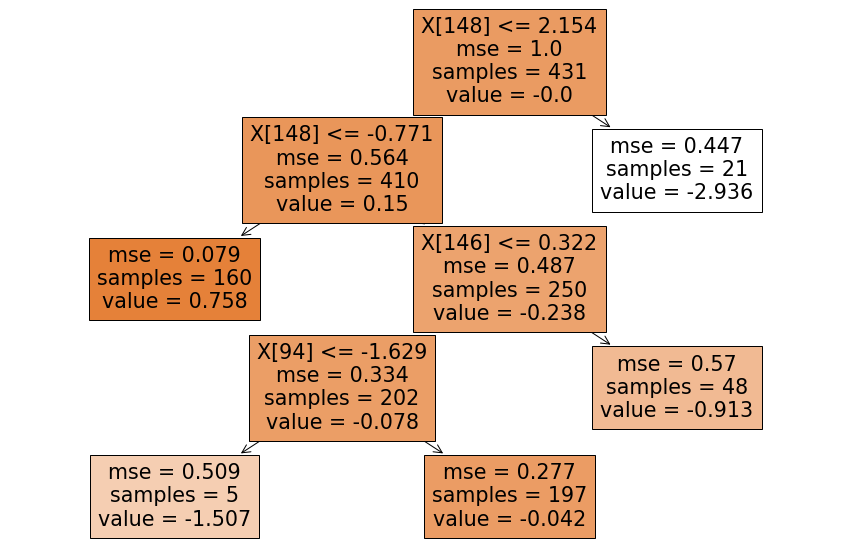

In [26]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf_acc,filled=True);

#  Actual vs predicted after pruning

In [27]:
df_repre = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

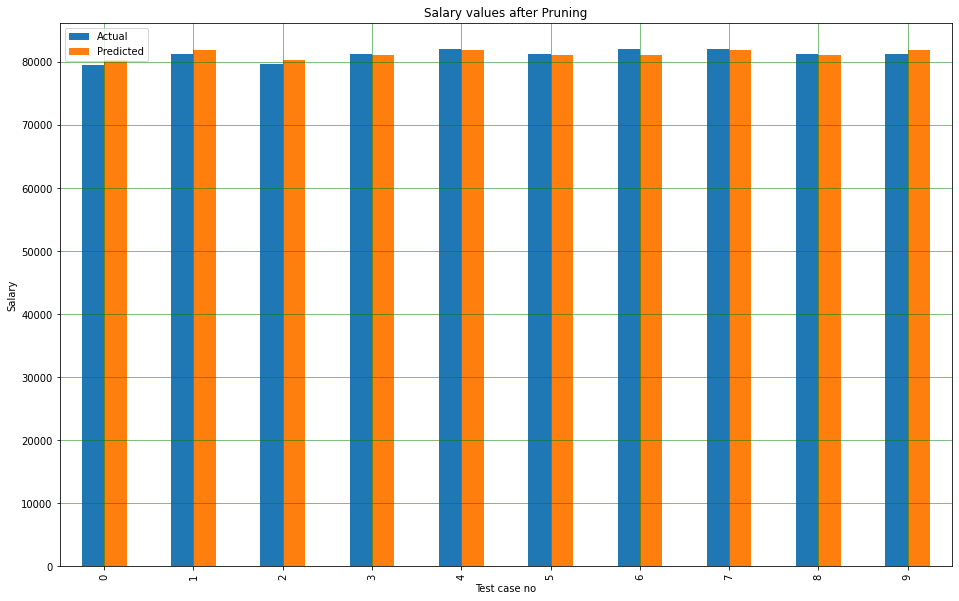

In [28]:
df1 = df_repre.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.ylabel("Salary")
plt.xlabel("Test case no")
plt.title("Salary values after Pruning")
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()